#### W04D01 - Dimensionality Reduction
* Dimensionality Reduction
    * class 1: dimensionality reduction (uses linear algebra to transform features)
        * PCA - principal component analysis - most used 
        * LDA - Linear Discriminant Analysis - most specific 
    * class 2: variable selection
        * filter methods 
        * wrapper methods
        * choosing most important variables 

* Motivation
    * high dimensionality - large number of variables/features/columns
    * rows = observations, more is better - features not as much
    * for unstructured data - images, video, audio. e.g. in an image, each pixel would be a column/feature
    * use less features/columns to represent data well
    * better for:
        * visualizations, lower computational complexity, improve model performance/accuracy, avoids over-fitting

* linear algebra to create new features in the most optimal way

#### PCA - Principal Component Analysis 
* represent many variables with fewer variables - minimize loss of information
* simple use: represent two vars as a single variable, e.g. bmi to capture weight/height - so you don't lose data
* ratio, get average, maximum, minimum
* linear combination aH + bW = x - multiply each by a weight/scale, creates a line or 'projection'
* How do we choose weights (a and b)
    * graphically 'best-fit' line passes through the mean of each variable (the origin) 
    * line that minimizes the perpendicular distance from the points to the line
    * line goes in the direction of MOST variation
    * line becomes "principal component 1 / PC1"

* multiple d variables reducing down to k variables (d > k)
* find first k principal components - creates a best fit line for each k 
* for each variable/dimension there are that many principal components, but only taking the k variable 
* PC1 - best fit line with the most variation
* PC2 - next most variation
    * must still pass through the mean of each variable
    * must be perpendicular/orthogonal to all other principal components
* by only using PC1 - we are keeping the principal components that have the most variation
* linear combination of all the columns 
* most variation meaning the direction your data is going in
* PCs are lines based on linear combinations of data
* d to k, and each PC represent a direction of your data, PC1 contains the most variation and decreases. 
* instead of points, end up with a line, that captures the data.
* data needs to be numeric - but can convert classes to nominal data/categories
* in images , the higher the value the more important the value of that pixel, i.e. the weight
<br>

* another way of thinking - 'change of basis'
    * instead of x and y, use a different basis - changing the 'axis' or coordinate system
    * PCA finds the most optimal basis 
<br>

* the math (needs review)
<br>

* Choosing the new dimensions - how many columns should you have
* scree plot -  choose optimal new dimension (number of PCs to keep)
    * shows how much variance is explained by each PC 
    * strategy: 
        * similar to elbow method, no additional explained variance from adding PCs 
        * keeps number of PCs up to a certain % of total variance explained e.g. (95% of var)

* data poins are projected onto a PC, to get one number 
* keep the first k PCs - for each dimensions - done on sklearn
    * eigenvalues of covariance - importance of PC
    * eignvectors of covariance matrix - direction of PC
* scale data before PCA
    * uses StandardScaler 
* unsupervised

#### LDA - Linear Discriminant Analysis 
* supervised - requires target variable to be categorical * 
* similar to PCA, creating new lines in data, but instead of most variatiation
* goal is to:
    * minimize intra-class variance - within a class
    * maximizes inter-class variance - between classes
* only for classification - target variable is categorical
* values based on the line that separates the clases - they all fall on different points in the line
* create components that best separates the class
* will probably put more weight on features that really separates them
* best LDs are at the beginning


### Feature Selection
* removes redundant features and keeps important ones
* no new features created 
* more information lost
* more interpretability
<br>

* Filter methods
    * correlation with target variable
    * high/low variance
    * feature similarity - correlation between features
    * Keep features with high scores, discard features with low scores
    * all from looking at the data - fast, no training involved just calculations
    * disadvantage - ignores feature combination (combo of two could be a better predictor), may keep redundant features 

* Wrapper Methods
    * train model multiple times with different combos of subsets of features
    * find best subset of features - trying with different combos
    * evaluates features in context of others - performance driven
    * disadvantage: slow, needs to retrain everytime 
    * methods: forward, backward, stepwise 
    * not possible to tell what's best unti ltried
    * different selection algorithms may give different answers
    * diff algorithms - same variables - may give different answers
    * eventually find which features are kept and eliminated

* Forward 
    * starting with no features, then run a model with one feature
    * from one feature add another feature - and so on.

* Backward
    * start with all, then remove a feature one at a time - see how they improve
    * keep removing one a time to get final

* Stepwise selection
    * combo of both
    * perform forward and backward - repeat 2 and 3 until you find an optimal set of features is obtained
    * can start with selected features/none or all 


#### Takeways
* dimensionality reduction - reduce number of features in an optimal way
* minimize  information loss and or maximize model performance 
* PCA/LDA  
    * creates new vars/dimensions using linear combination
    * keep the best new variables
    * minimizes loss of information 
    * PCA unsupervised, LDA supervised

* can do PCA and then change filter - to see how it improves 

#### From Compass
* PCA using SVD (Statquest)
* splits data into groups
* finds the mid point (average on X and average on Y)
* shift the midpoint to the origin (0,0)
* fit a line through the origin, and fits the data
* "fit"
    * can minimize the distance within
    * maximize the distance between groups 
    * distance from projected point on the line to the origin is maximized sum of squares
    * largest distance is PC1
* PC1 is a linear combination of variables
* in SVD it is scaled to unit vector (1) - also called singular vector or eigenvector of PC1
* SS(distance for PC1) is eigenvalue of PC1 
* PC2 - perpendicular, -1, instead of positive on x
* when plotting PC1 becomes the X axis and PC2 the y-axis, and points projected on this new axis
* can then calculate how much each PC accounts for the variation around the PCs
* scree plot can be used to see percentage of variation accounted for by each PC1
* convert everything to a 2D, just use PC1 and PC2 since those usually account for most variance
* if no difference between PCs in explaining variance - can still be used to cluster data - but won't be as accurate


#### PCA Walkthrough
[pca](https://drscotthawley.github.io/blog/2019/12/21/PCA-From-Scratch.html)

In [2]:
# Covariance - two data dimensions that covary, vary together
# computed like variance but instead of squaring the deviation from the mean for one variable, we multiply the deviations for the two variable
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

N = 100 
x = np.random.normal(size=N)
y = 0.5*x + 0.2*(np.random.normal(size=N))

fig = go.Figure(data=[go.Scatter(x=x, y=y, mode='markers', 
                marker=dict(size=8,opacity=0.5), name="data" )])
fig.update_layout( xaxis_title="x", yaxis_title="y",
    yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

In [3]:
print("Variance in x =",np.var(x))
print("Variance in y =",np.var(y))

Variance in x = 0.8662183182298651
Variance in y = 0.2631317375517914


In [4]:
# note divide by n-1 to reduce small sample bias - negligible at high samples
def covariance(a,b):
    return ( (a - a.mean())*(b - b.mean()) ).sum() / (len(a)-1)

print("Covariance of x & y =",covariance(x,y))
print("Covariance of y & x =",covariance(x,y))
print("Covariance of x with itself =",covariance(x,x),", variance of x =",np.var(x))
print("Covariance of y with itself =",covariance(y,y),", variance of x =",np.var(y))

Covariance of x & y = 0.44512177596174396
Covariance of y & x = 0.44512177596174396
Covariance of x with itself = 0.8749679982119849 , variance of x = 0.8662183182298651
Covariance of y with itself = 0.2657896338906984 , variance of x = 0.2631317375517914


In [5]:
# create a covariance matrix - will be a square and symmetric
# diagonal is covariance with itself
data = np.stack((x,y),axis=1)   # pack the x & y data together in one 2D array
print("data.shape =",data.shape)
cov = np.cov(data.T)   # .T b/c numpy wants varibles along rows rather than down columns?
print("covariance matrix =\n",cov)

data.shape = (100, 2)
covariance matrix =
 [[0.874968   0.44512178]
 [0.44512178 0.26578963]]


#### 3D data

In [6]:
z = -.5*x + 2*np.random.uniform(size=N)
data = np.stack((x,y,z)).T
print("data.shape =",data.shape)
cov = np.cov(data.T)
print("covariance matrix =\n",cov)

# Plot our data
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers', marker=dict(size=8,opacity=0.5), name="data" )])
fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

data.shape = (100, 3)
covariance matrix =
 [[ 0.874968    0.44512178 -0.43490924]
 [ 0.44512178  0.26578963 -0.21656074]
 [-0.43490924 -0.21656074  0.55028797]]


In [7]:
# finding principal components - where direction goes along the data that varies most
# requires finding eigenvectors of the covariance matrix 
from numpy import linalg as LA
lambdas, vs = LA.eig(cov)
lambdas, vs


(array([1.39053804, 0.03059273, 0.26991484]),
 array([[-0.76769565, -0.48110301,  0.42330047],
        [-0.40018361,  0.87585575,  0.2696846 ],
        [ 0.50049622, -0.03763778,  0.86492018]]))

In [8]:
A = np.array([[-2,2,1],[-5,5,1],[-4,2,3]])

def sorted_eig(A):  # For now we sort 'by convention'. For PCA the sorting is key. 
    lambdas, vs = LA.eig(A)
    # Next line just sorts values & vectors together in order of decreasing eigenvalues
    lambdas, vs = zip(*sorted(zip(list(lambdas), list(vs.T)),key=lambda x: x[0], reverse=True))
    return lambdas, np.array(vs).T  # un-doing the list-casting from the previous line

lambdas, vs = sorted_eig(A)
lambdas # hold off on printing out the eigenvectors until we do the next part!

(3.0000000000000013, 1.999999999999999, 1.0000000000000004)

In [9]:
# get the eigenvectors from the eigenvalues 
# eigenvectors can be expressed as unit vectors, and multiplied by an arbitrary constant
# therefore can be negative - or positive, is the same
# when multiplied by A/divided by eigen values - gives the vector back
print(" "*15,"Ours"," "*28,"Numpy")
print(np.array([1,2,1])/np.sqrt(6), vs[:,0])
print(np.array([1,1,2])/np.sqrt(6), vs[:,1])
print(np.array([1,1,1])/np.sqrt(3), vs[:,2])

                Ours                              Numpy
[0.40824829 0.81649658 0.40824829] [-0.40824829 -0.81649658 -0.40824829]
[0.40824829 0.40824829 0.81649658] [0.40824829 0.40824829 0.81649658]
[0.57735027 0.57735027 0.57735027] [0.57735027 0.57735027 0.57735027]


In [10]:
lambdas, vs = sorted_eig(cov)  # Compute e'vals and e'vectors of cov matrix 
print("lambdas, vs =\n",lambdas,"\n",vs)

# Re-plot our data
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers',  
        marker=dict(size=8,opacity=0.5), name="data" ) ])

# Draw some extra 'lines' showing eigenvector directions
n_ev_balls = 50    # the lines will be made of lots of balls in a line
ev_size= 3    # size of balls
t = np.linspace(0,1,num=n_ev_balls)  # parameterizer for drawing along vec directions

for i in range(3):   # do this for each eigenvector 
    # Uncomment the next line to scale (unit) vector by size of the eigenvalue
    # vs[:,i] *= lambdas[i] 
    ex, ey, ez = t*vs[0,i], t*vs[1,i],  t*vs[2,i]
    fig.add_trace(go.Scatter3d(x=ex, y=ey, z=ez,mode='markers',
                marker=dict(size=ev_size,opacity=0.8), name="v_"+str(i+1)))

fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

lambdas, vs =
 (1.390538035032285, 0.26991483727379845, 0.030592728857023493) 
 [[-0.76769565  0.42330047 -0.48110301]
 [-0.40018361  0.2696846   0.87585575]
 [ 0.50049622  0.86492018 -0.03763778]]


In [11]:
# eigenvector points from largest to smallest direction of biggest variance 
# eigen vectors are your principal components - and can project data onto these components
# flatten data along smallest-variance directions 
# done by multipling by the eigenvector matrix
lambdas, vs = sorted_eig(cov)  

proj_cov = vs.T @ cov @ vs   # project the covariance matrix, using eigenvectors
proj_cov

array([[ 1.39053804e+00, -3.45366644e-16, -9.60989888e-17],
       [-2.85344943e-16,  2.69914837e-01,  5.80245446e-17],
       [-3.32056538e-17,  5.03686969e-17,  3.05927289e-02]])

In [12]:
proj_cov[np.abs(proj_cov) < 1e-15] = 0
proj_cov

array([[1.39053804, 0.        , 0.        ],
       [0.        , 0.26991484, 0.        ],
       [0.        , 0.        , 0.03059273]])

In [13]:
# create N by 3 matrix - to plot on

data = np.stack((x,y,z),axis=1)
data.shape

(100, 3)

In [14]:
# either - using eigenvectors to rotate the full data set into a coordinate system
# truncate the last eigen vector creating a 3x2 projection - to project data on a 2D plane based on the 2 eigenvectors
print("\n 1. All data, rotated into new coordinate system")
W = vs[:,0:3]  # keep the all the eigenvectors
new_data_all = data @ W  # project all the data 
print("Checking: new_data_all.shape =",new_data_all.shape)
print("New covariance matrix = \n",np.cov(new_data_all.T) )


print("\n 2. Truncated data projected onto principal axes of coordinate system")

W = vs[:,0:2]  # keep only the first and 2nd eigenvectors 
print("W.shape = ",W.shape) 
new_data_proj = data @ W   # project 
print("Checking: new_data_proj.shape =",new_data_proj.shape)
print("New covariance matrix in projected space = \n",np.cov(new_data_proj.T) )

# Difference between them
diff = new_data_all[:,0:2] - new_data_proj
print("\n Absolute maximum difference between the two methods = ",np.max(np.abs(diff)))


 1. All data, rotated into new coordinate system
Checking: new_data_all.shape = (100, 3)
New covariance matrix = 
 [[ 1.39053804e+00 -2.26957986e-16 -5.72347899e-17]
 [-2.26957986e-16  2.69914837e-01  3.84360165e-18]
 [-5.72347899e-17  3.84360165e-18  3.05927289e-02]]

 2. Truncated data projected onto principal axes of coordinate system
W.shape =  (3, 2)
Checking: new_data_proj.shape = (100, 2)
New covariance matrix in projected space = 
 [[ 1.39053804e+00 -2.26957986e-16]
 [-2.26957986e-16  2.69914837e-01]]

 Absolute maximum difference between the two methods =  0.0


In [15]:
# red is projected data set
# blue is full data set
fig = go.Figure(data=[(go.Scatter3d(x=new_data_all[:,0], y=new_data_all[:,1], z=new_data_all[:,2],
        mode='markers', marker=dict(size=4,opacity=0.5), name="full data" ))])
fig.add_trace(go.Scatter3d(x=new_data_proj[:,0], y=new_data_proj[:,1], z=new_data_proj[:,0]*0,
        mode='markers', marker=dict(size=4,opacity=0.5), name="projected" ) )
fig.update_layout(scene_aspectmode='data')
fig.show()

In [16]:
# how many dimensions - skree plot, and using elbow rule

(1797, 64) (1797,) 

This is supposed to be a '0':


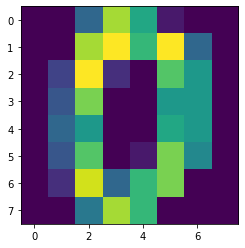

This is supposed to be a '1':


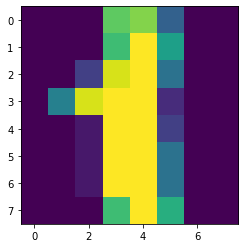

This is supposed to be a '2':


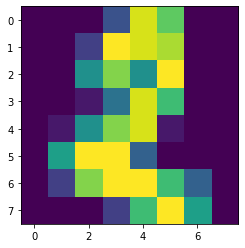

This is supposed to be a '3':


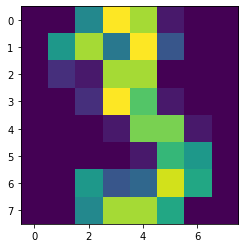

This is supposed to be a '4':


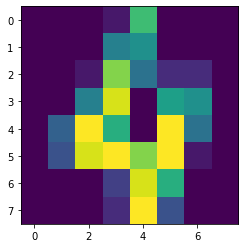

This is supposed to be a '5':


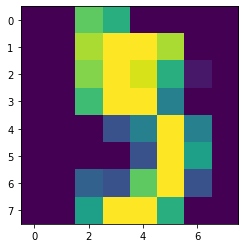

This is supposed to be a '6':


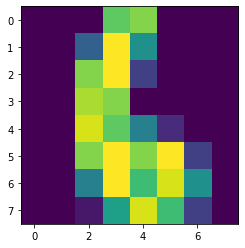

This is supposed to be a '7':


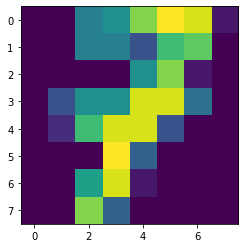

In [17]:
from sklearn.datasets import load_digits 
from sklearn.decomposition import PCA
digits  = load_digits()
X = digits.data / 255.0 
Y = digits.target
print(X.shape, Y.shape,'\n')

# Let's look a a few examples
for i in range(8):  # show 8 examples 
    print("This is supposed to be a '",Y[i],"':",sep="")
    plt.imshow(X[i].reshape([8,8]))
    plt.show()

In [18]:
# using PCA to reduce the features (each pixel) from 8x8 to 2

digits_cov = np.cov(X.T)
print("digits_cov.shape = ",digits_cov.shape)
lambdas, vs = sorted_eig(np.array(digits_cov)) 

W = vs[:,0:2]  # just keep two dimensions
proj_digits = X @ W
print("proj_digits.shape = ", proj_digits.shape)

# Make the plot 
fig = go.Figure(data=[go.Scatter(x=proj_digits[:,0], y=proj_digits[:,1],# z=Y, #z=proj_digits[:,2],
                mode='markers', marker=dict(size=6, opacity=0.7, color=Y), text=['digit='+str(j) for j in Y] )])
fig.update_layout( xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=0, z=1.5)))
fig.show()


digits_cov.shape =  (64, 64)
proj_digits.shape =  (1797, 2)


In [19]:
W = vs[:,0:3]  # just three dimensions - better separation
proj_digits = X @ W
print("proj_digits.shape = ", proj_digits.shape)

# Make the plot, separate them by "z" which is the digit of interest.  
fig = go.Figure(data=[go.Scatter3d(x=proj_digits[:,0], y=proj_digits[:,1], z=proj_digits[:,2],
                mode='markers', marker=dict(size=4, opacity=0.8, color=Y, showscale=True), 
                text=['digit='+str(j) for j in Y] )])
fig.update_layout(title="8x8 Handwritten Digits", xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

proj_digits.shape =  (1797, 3)


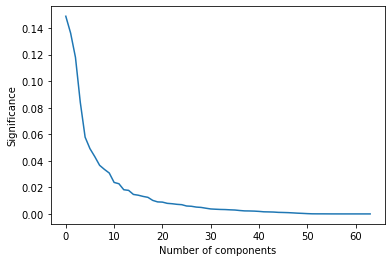

In [20]:
plt.plot( np.abs(lambdas)/np.sum(lambdas) )
plt.xlabel('Number of components')
plt.ylabel('Significance') 
plt.show()

#### Filter Methods
[filter/wrapper](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

* filter by:
    * too high variance
    * too low
    * feature similarity based on r^2
    * chi-squared test
    * anova
    * correlation coefficient scores
* based on input and output variables - see chart on compass
* for unsupervsied mostly just based on correlation - removing redundant variables 
* supervised based on target 
    * use wrapper
    * filter
    * intrinsic

In [21]:
# data from house prices
import pandas as pd

In [25]:
df_numeric = pd.read_csv('df_numeric.csv')

In [31]:
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,MiscVal,MoSold,YrSold,GarageYrBlt_missing_ind,LotFrontage_missing_ind,MasVnrArea_missing_ind,1stFlrSF_log,1stFlr_2ndFlr_SF,OverallGrade,SimplGarageQual
0,60,65.0,8450,2,4,4,3,7,5,2003,...,0,2,2008,0,0,0,6.752270,1710,35,1
1,20,80.0,9600,2,4,4,3,6,8,1976,...,0,5,2007,0,0,0,7.140453,1262,48,1
2,60,68.0,11250,2,3,4,3,7,5,2001,...,0,9,2008,0,0,0,6.824374,1786,35,1
3,70,60.0,9550,2,3,4,3,7,5,1915,...,0,2,2006,0,0,0,6.867974,1717,35,1
4,60,84.0,14260,2,3,4,3,8,5,2000,...,0,12,2008,0,0,0,7.043160,2198,40,1


In [26]:
# separate out the y, target variable to keep it as is 
y = df_numeric.SalePrice
df_numeric.drop("SalePrice",axis=1, inplace=True)

In [27]:
# remove all with small variance - smaller variance has less predictive power - because values are all the same
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
df_transformed = vt.fit_transform(df_numeric)

In [30]:
df_transformed.shape # 9 variables deleted from 59

(1458, 50)

In [32]:
# returning back to a dataframe - transform converts to numpy
# columns we have selected
# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = df_numeric.columns[vt.get_support()]
# transforming an array back to a data-frame preserves column labels
df_transformed = pd.DataFrame(df_transformed, columns = selected_columns)

In [33]:
# remove one feature with highly correlated pairs, get corr matrix, get pairs, and remove the correlated column
# step 1
df_corr = df_transformed.corr().abs()

# step 2
indices = np.where(df_corr > 0.8) 
indices = [(df_corr.index[x], df_corr.columns[y]) 
for x, y in zip(*indices)
    if x != y and x < y]

# step 3
for idx in indices: #each pair
    try:
        df_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [34]:
print(indices)

[('TotalBsmtSF', '1stFlrSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('GrLivArea', '1stFlr_2ndFlr_SF'), ('TotRmsAbvGrd', '1stFlr_2ndFlr_SF'), ('GarageCars', 'GarageArea'), ('GarageQual', 'GarageCond')]


In [35]:
# select k-best meaning best relationship with target variable - using forward wrapper - adds variable everytime
# since data is numerical - use an f_regression function, other technique used if categorical
from sklearn.feature_selection import f_regression, SelectKBest
skb = SelectKBest(f_regression, k=10)
X = skb.fit_transform(df_transformed, y)

In [40]:
# this will give us the position of top 10 columns - skb.get_support returns bools if good based on regression
skb.get_support()
# column names
df_transformed.columns[skb.get_support()]
X = pd.DataFrame(X,columns=df_transformed.columns[skb.get_support()])